In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [3]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report

In [4]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [5]:
import time
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [20]:
import shap

## Load dataset

In [6]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


## Visualize data

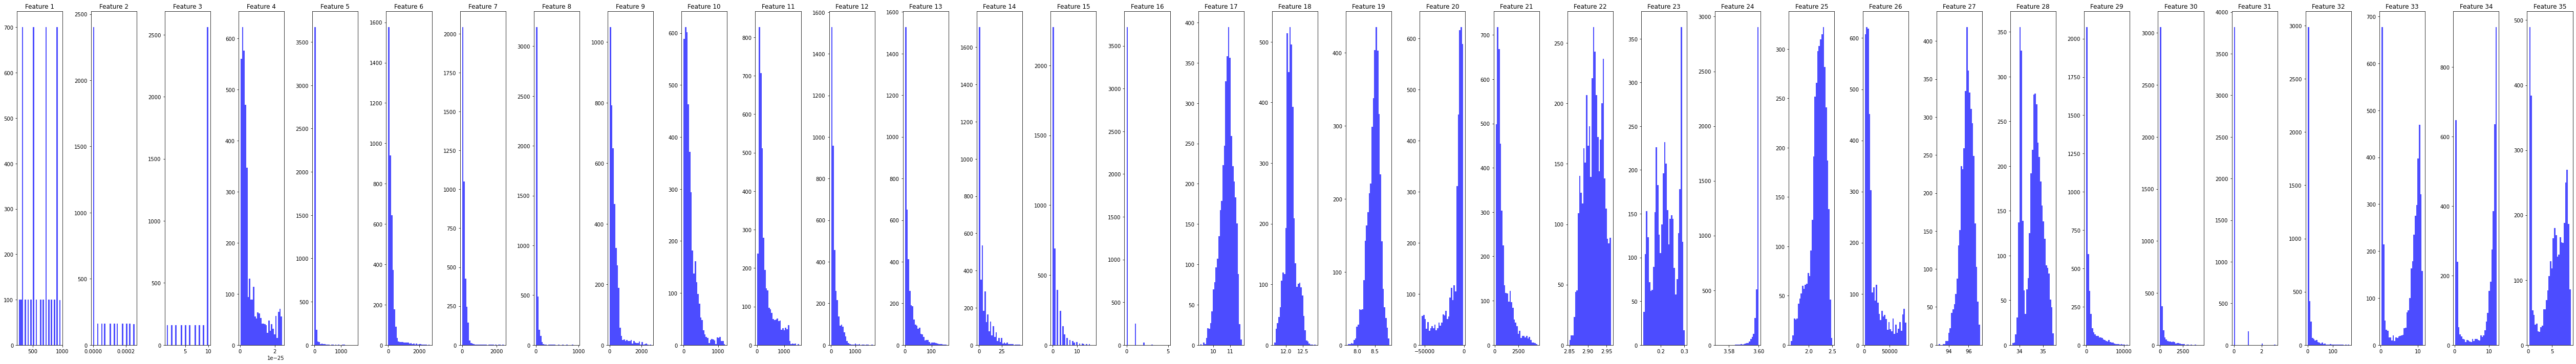

In [7]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


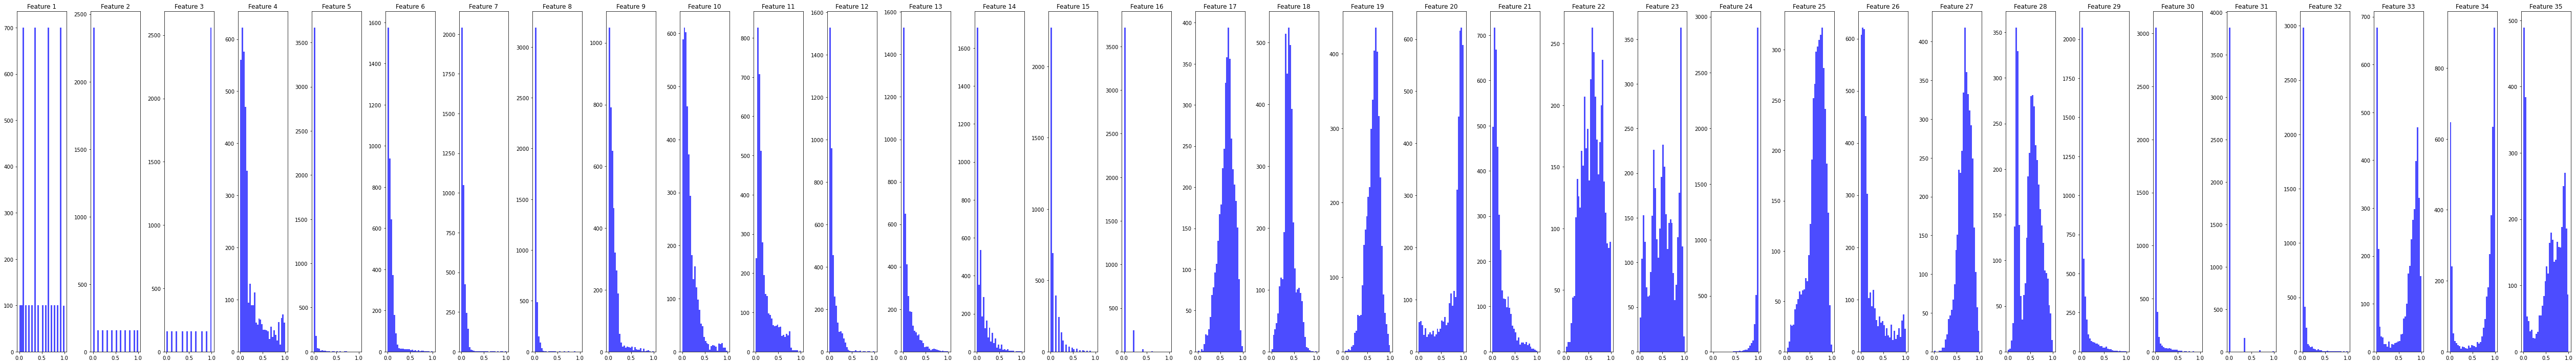

In [8]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

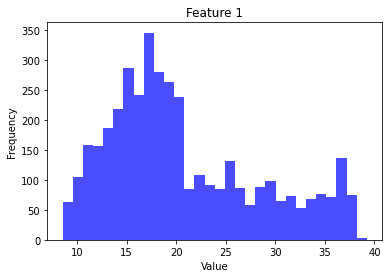

In [9]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [10]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp 
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


In [11]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]
        
    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0])) 
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc
    

## Model Training

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor


name ='RF'
# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation


rf = RandomForestRegressor(bootstrap= True, max_depth= 15, min_samples_leaf= 1, min_samples_split= 2, n_estimators=1024,random_state = 42)

# rf_grid = GridSearchCV(estimator=rf, param_grid=params_grid, cv=5, verbose=2, n_jobs=-1)


predictions_list = {'train':None,'test':None,'val':None}

training_start = time.time()
rf.fit(features_train, labels_train)
training_end = time.time()

# print("Best parameters found: ", rf_grid.best_params_)
# print("Best grid search score: ", rf_grid.best_score_)

rf_best = rf
print('E', rf_best)

val_start = time.time()
y_pred_validation = rf_best.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation

y_pred_train = rf_best.predict(features_train)
predictions_list['train'] = y_pred_train

testing_start = time.time()
y_pred_test = rf_best.predict(features_test)
# y_pred = rf_best.predict(features_test)
testing_end = time.time()
predictions_list['test'] = y_pred_test

#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val'])
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} , MAPD:{val_mapd:.8f} , R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train'])
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f},MAPD:{train_mapd:.8f} , R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test'])
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f}, MAPD:{test_mapd:.8f} , R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


C:\Users\sanka\AppData\Local\Temp\ipykernel_31872\2222718051.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(features_train, labels_train)


E RandomForestRegressor(max_depth=15, n_estimators=1024, random_state=42)
Validation set with RF - RMSE: 0.2500578162, MSE: 0.0625289115, MAE: 0.1295100793 , MAPD:0.67598344 , R^2: 0.9988748521
Train set with RF - RMSE: 0.0797938377, MSE: 0.0063670565, MAE: 0.0458577023,MAPD:0.22437124 , R^2: 0.9998897852
Test set with RF - RMSE: 0.2787693261, MSE: 0.0777123372, MAE: 0.1416170348, MAPD:0.64400372 , R^2: 0.9987173900
Time taken for training: 34.1896004677 seconds
Time taken for testing: 0.1315364838 seconds
Time taken for validation: 0.1337547302 seconds


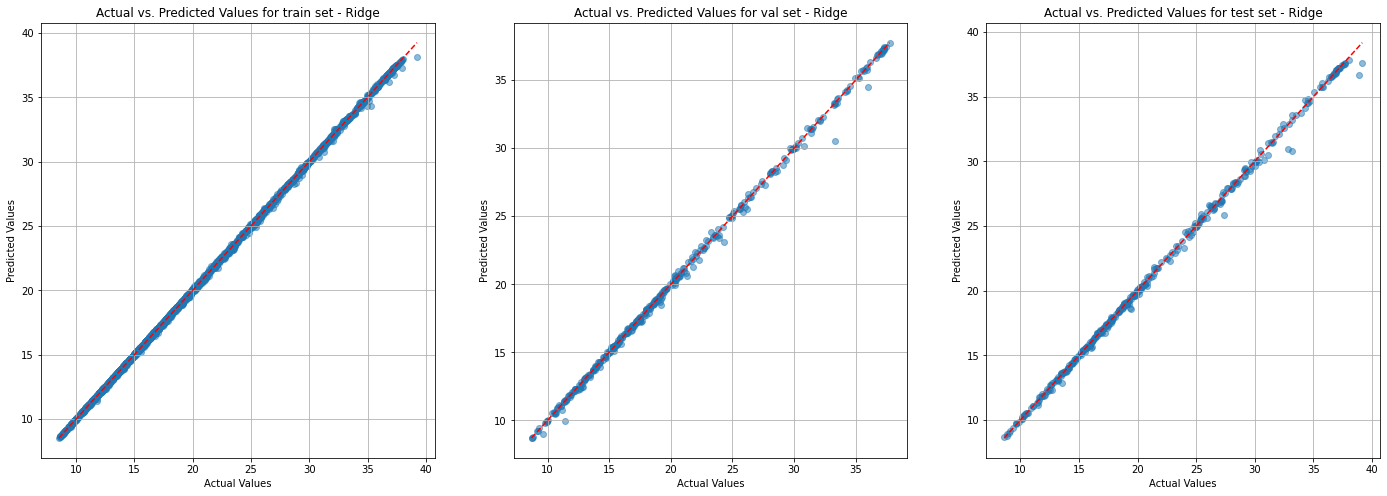

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - Ridge")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

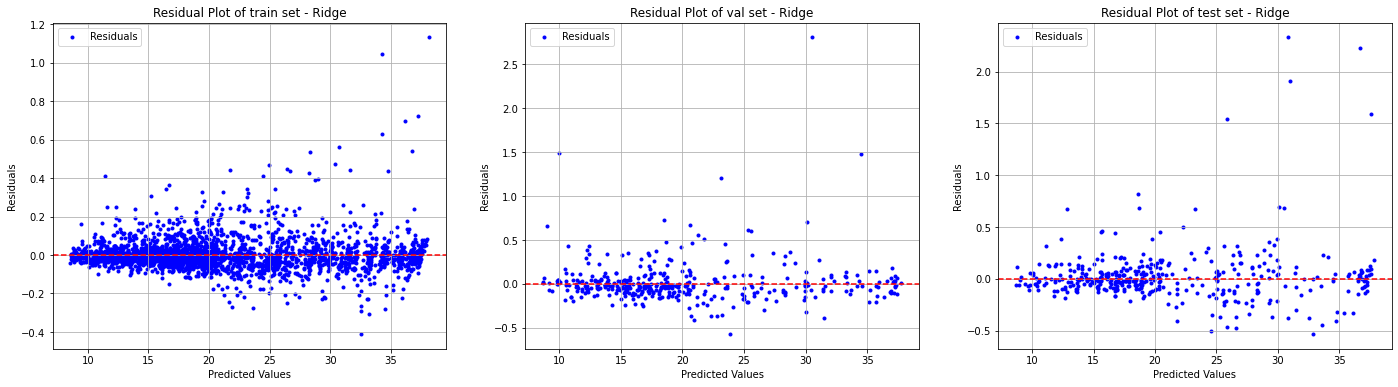

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Ridge')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


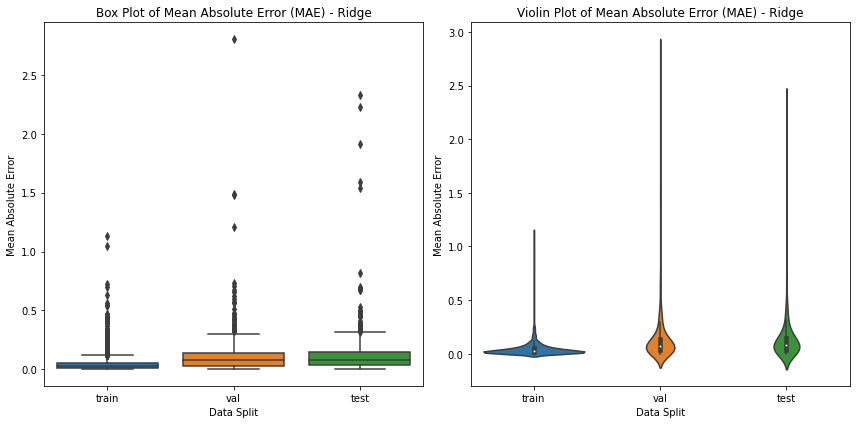

In [15]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [16]:
col_names_str = "T, tau, time, Volume, S_100, S_111, S_110, S_311, Curve_1-10, Curve_11-20, Curve_21-30, Curve_31-40, Curve_41-50, Curve_51-60, Curve_61-70, Curve_71-80, Avg_total, Avg_bulk, Avg_surf, Total_E, Formation_E, Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds, angle_avg, angle_std, FCC, HCP, ICOS, DECA, q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf"
cols = col_names_str.split(',')
cols =[c.strip() for c in cols]
# print(cols)
cols_np = np.array(cols)
print(cols_np)
print(cols_np.shape)

['T' 'tau' 'time' 'Volume' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10'
 'Curve_11-20' 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60'
 'Curve_61-70' 'Curve_71-80' 'Avg_total' 'Avg_bulk' 'Avg_surf' 'Total_E'
 'Formation_E' 'Avg_bonds' 'Std_bonds' 'Max_bonds' 'Min_bonds' 'N_bonds'
 'angle_avg' 'angle_std' 'FCC' 'HCP' 'ICOS' 'DECA' 'q6q6_avg_total'
 'q6q6_avg_bulk' 'q6q6_avg_surf']
(35,)


In [17]:
pd.options.display.max_columns = None
features_train_df = pd.DataFrame(features_train, columns=cols)
features_train_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.357143,0.0,1.0,0.121008,0.057915,0.107854,0.020307,0.029928,0.148205,0.102843,0.059438,0.001174,0.000000,0.000000,0.0,0.0,0.666721,0.328632,0.563220,0.881721,0.097807,0.392482,0.266821,0.996049,0.818133,0.115757,0.797784,0.641690,0.074483,0.056823,0.0,0.060976,0.907309,0.952472,0.863790
1,0.071429,0.0,1.0,0.094118,0.000000,0.140549,0.044758,0.033024,0.139037,0.069398,0.059438,0.021139,0.000000,0.000000,0.0,0.0,0.604777,0.326268,0.700351,0.906289,0.061205,0.235131,0.082807,0.988147,0.903067,0.089253,0.816472,0.725791,0.059987,0.049144,0.0,0.085366,0.908386,0.949666,0.944866
2,0.928571,0.0,1.0,0.128151,0.000000,0.113115,0.025280,0.002064,0.130634,0.169732,0.062704,0.027598,0.025641,0.022222,0.0,0.0,0.700475,0.471058,0.726992,0.879346,0.161850,0.741993,0.696828,0.998204,0.597269,0.123762,0.668383,0.442706,0.018324,0.016235,0.0,0.012195,0.728838,0.827630,0.562978
3,0.928571,0.0,1.0,0.115126,0.000000,0.051484,0.020721,0.004128,0.081742,0.141304,0.103201,0.042866,0.025641,0.044444,0.0,0.0,0.677566,0.433393,0.627610,0.892252,0.151954,0.756526,0.743001,0.992816,0.549163,0.110572,0.647262,0.485310,0.017322,0.002852,0.0,0.000000,0.664866,0.803323,0.380958
4,0.928571,0.0,1.0,0.006261,0.000000,0.001879,0.010361,0.004128,0.004966,0.051003,0.036577,0.014680,0.019231,0.000000,0.0,0.0,0.267679,0.425648,0.298146,0.994267,0.021339,0.698753,0.959020,0.985273,0.661096,0.005949,0.275268,0.149671,0.000000,0.000000,0.0,0.000000,0.047440,0.050969,0.058316


In [18]:
features_test_df = pd.DataFrame(features_test, columns=cols)
features_test_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.642857,0.0,1.0,0.137815,0.034106,0.067644,0.030253,0.009288,0.141329,0.089465,0.094056,0.044040,0.025641,0.044444,0.000000,0.0,0.699216,0.434861,0.629781,0.867766,0.144070,0.586346,0.534771,0.970905,0.708974,0.132962,0.709989,0.586149,0.057617,0.015358,0.0,0.000000,0.830782,0.930319,0.641046
1,0.071429,0.0,1.0,0.113025,0.000000,0.197670,0.048902,0.000000,0.198625,0.000836,0.041803,0.037581,0.000000,0.000000,0.000000,0.0,0.634551,0.331812,0.739686,0.887331,0.070192,0.262313,0.068921,0.719828,0.892165,0.107702,0.846525,0.957676,0.097912,0.000000,0.0,0.000000,0.944114,0.984828,0.971144
2,0.928571,0.0,1.0,0.044118,0.000000,0.003382,0.012433,0.007224,0.010313,0.113712,0.081646,0.029360,0.070513,0.022222,0.000000,0.0,0.457858,0.262922,0.443878,0.959670,0.078529,0.798152,0.934918,0.971264,0.556526,0.040876,0.481406,0.177720,0.000000,0.000000,0.0,0.000000,0.024286,0.024908,0.031550
3,1.000000,0.9,0.0,0.021807,0.000000,0.001127,0.003315,0.002064,0.009549,0.078595,0.045069,0.022901,0.089744,0.111111,0.058824,0.0,0.197612,0.026333,0.000000,0.979421,0.037220,0.707365,0.993283,0.946121,0.330810,0.018708,0.444691,0.093384,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004378
4,0.928571,0.0,1.0,0.158403,0.003218,0.090192,0.018235,0.006192,0.123377,0.184783,0.095363,0.032883,0.070513,0.044444,0.058824,0.0,0.719160,0.418718,0.648071,0.851018,0.195826,0.774468,0.692651,0.993894,0.675868,0.152926,0.685985,0.500107,0.027806,0.018210,0.0,0.036585,0.716461,0.814078,0.491552


In [21]:
# features_train
train_feature_sample_df = shap.utils.sample(features_train_df, 2500)
print(train_feature_sample_df.shape)

LR_model = rf_best

# explainer__ = shap.Explainer(LR_model.predict, train_feature_sample_df) #this was probly from chatgpt!
explainer__ = shap.Explainer(LR_model, train_feature_sample_df)
shap_values = explainer__(features_test_df)
print(shap_values.feature_names)

(2500, 35)


 99%|===================| 395/400 [01:38<00:01]        

['T', 'tau', 'time', 'Volume', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'Total_E', 'Formation_E', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf']


In [22]:
#shap values converted to a dataframe

print(type(shap_values))
print(type(shap_values.values))
shap_values_df = pd.DataFrame(shap_values.values, columns=cols)
shap_values_abs_df = shap_values_df.abs()
shap_values_df.head()

<class 'shap._explanation.Explanation'>
<class 'numpy.ndarray'>


,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.000783,-0.009413,-0.001668,0.046694,-0.004158,-0.001767,-0.004741,0.007892,0.004737,-0.003379,0.004178,-0.002946,-0.008543,-0.003464,0.000278,-0.000873,-0.013771,0.001351,-0.007120,-1.412623,-0.000546,0.000620,-0.001311,-0.001514,-0.002741,-0.230388,-0.004210,-0.002190,0.002312,0.008836,0.000011,-0.001974,-0.000375,0.003258,-0.000350
1,-0.001407,-0.011431,-0.001402,-1.062905,0.010376,0.029636,0.001762,0.019513,0.044814,-0.024793,0.005045,0.000823,-0.010230,-0.003888,-0.000356,-0.000655,0.010415,-0.004218,-0.002177,-1.486336,-0.006173,0.002333,0.000174,-0.003529,-0.007777,-0.265944,-0.034187,-0.003902,-0.026482,-0.003724,0.000006,-0.000546,-0.012219,-0.035068,-0.004118
2,0.002493,-0.006865,-0.001224,-4.963112,0.005782,-0.009892,0.000156,0.007285,-0.016584,0.014561,0.007071,0.004778,-0.001191,-0.003774,0.000081,-0.000621,0.026359,-0.000256,-0.000736,-1.929939,-0.001726,0.003212,0.003594,-0.002403,0.005725,-0.409004,0.019137,0.005232,0.006802,-0.002655,0.000006,-0.000405,0.002701,0.007815,0.002494
3,0.002117,0.020292,0.004298,-6.770236,0.005816,-0.002071,0.002912,0.014383,-0.007510,-0.002154,0.001329,0.002525,0.001194,0.001240,0.000475,-0.000690,0.040656,-0.002955,0.001775,-2.154894,-0.005574,-0.000009,0.004208,-0.003933,0.006477,-0.559052,0.012871,0.014039,0.005656,-0.000362,0.000005,-0.000260,0.005686,0.008823,0.003499
4,0.002177,-0.016524,-0.003206,0.743291,-0.000316,-0.000093,-0.002774,0.010237,0.006395,0.008387,0.001794,-0.000303,-0.008837,-0.003227,-0.000177,-0.000659,-0.020639,0.000386,-0.002858,-1.302943,0.001787,-0.000388,0.000919,-0.001048,-0.001074,-0.156975,0.001720,0.000403,0.001816,0.008562,0.000012,0.000857,0.001164,0.010828,0.000370


In [23]:
shap_values_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000256,-0.002650,-0.000332,0.146631,0.000311,0.001872,-0.000767,0.001700,0.001376,-0.000196,0.001416,-0.000026,-0.000346,0.000249,0.000178,-0.000367,0.000744,-0.000259,0.001512,-0.016961,0.001169,0.000048,0.000045,-0.000193,-0.000784,-0.008718,0.000208,-0.000723,0.000463,0.000342,0.000003,-0.000299,-0.000219,0.000856,-0.000694
std,0.003094,0.015935,0.003438,4.902444,0.010936,0.021911,0.006703,0.018223,0.020804,0.011813,0.010287,0.006279,0.008423,0.005128,0.001963,0.002919,0.027247,0.002851,0.019853,2.318046,0.014331,0.002119,0.002934,0.005589,0.006822,0.892986,0.019201,0.005879,0.004616,0.007225,0.000080,0.002622,0.003744,0.007906,0.003249
min,-0.012611,-0.033756,-0.016320,-9.227683,-0.053239,-0.019018,-0.031545,-0.093698,-0.052876,-0.063579,-0.049951,-0.022584,-0.023497,-0.013550,-0.008462,-0.005538,-0.121414,-0.009937,-0.012820,-2.580032,-0.029501,-0.006622,-0.008074,-0.014839,-0.022015,-0.852472,-0.085526,-0.014628,-0.026482,-0.028762,-0.000558,-0.014711,-0.013030,-0.071448,-0.011213
25%,-0.001541,-0.009944,-0.001555,-3.526306,-0.003610,-0.005291,-0.004169,-0.002677,-0.008917,-0.006305,0.000985,-0.002609,-0.005459,-0.002816,-0.000421,-0.000679,-0.017898,-0.001773,-0.003323,-1.781095,-0.006655,-0.001188,-0.001692,-0.003060,-0.004791,-0.429384,-0.011443,-0.004622,-0.002388,-0.003316,0.000006,-0.000946,-0.002273,-0.000798,-0.002830
50%,-0.000050,-0.007623,-0.001036,-0.580308,0.000221,-0.002897,-0.000439,0.006238,-0.003806,0.002343,0.004143,0.000472,-0.002138,-0.001321,-0.000138,-0.000648,0.002673,-0.000435,-0.001564,-1.425075,-0.001273,-0.000230,-0.000407,-0.001773,-0.001097,-0.255331,0.002007,-0.001250,0.001524,-0.001540,0.000008,-0.000188,0.000637,0.002975,-0.000418
75%,0.001893,-0.002514,0.001267,3.696013,0.005684,0.001586,0.002905,0.011704,0.011186,0.005850,0.006386,0.003291,0.005874,0.003637,0.000094,-0.000625,0.023900,0.000888,0.000246,2.241440,0.005242,0.000997,0.001737,0.002216,0.002854,-0.194097,0.010677,0.002737,0.003545,0.004528,0.000011,0.000401,0.002290,0.004801,0.000966
max,0.012384,0.093280,0.019027,9.335187,0.066924,0.258615,0.023734,0.068524,0.194376,0.053101,0.017794,0.021856,0.039811,0.022345,0.014262,0.042349,0.072220,0.020832,0.211507,4.235083,0.100032,0.008876,0.011904,0.045893,0.035660,2.787269,0.185830,0.027955,0.013999,0.052874,0.000739,0.024913,0.009451,0.014138,0.017542


In [24]:
shap_values_abs_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,0.002308,0.012021,0.002359,4.089069,0.006506,0.008837,0.004867,0.012315,0.013644,0.008613,0.007113,0.004481,0.006698,0.003999,0.000881,0.001090,0.022853,0.001938,0.006154,2.139533,0.008883,0.001525,0.002184,0.003693,0.005065,0.587752,0.012842,0.004550,0.003695,0.005023,2.347523e-05,0.001320,0.002914,0.005659,0.002443
std,0.002074,0.010775,0.002519,2.700578,0.008790,0.020133,0.004667,0.013526,0.015751,0.008075,0.007556,0.004392,0.005107,0.003214,0.001763,0.002732,0.014812,0.002105,0.018933,0.885750,0.011297,0.001469,0.001958,0.004196,0.004631,0.671701,0.014261,0.003786,0.002801,0.005199,7.652328e-05,0.002284,0.002357,0.005581,0.002248
min,0.000014,0.000236,0.000025,0.038699,0.000008,0.000055,0.000022,0.000032,0.000021,0.000072,0.000037,0.000023,0.000050,0.000014,0.000004,0.000535,0.000102,0.000002,0.000006,0.037208,0.000055,0.000009,0.000004,0.000004,0.000039,0.044505,0.000140,0.000022,0.000060,0.000087,3.811247e-07,0.000006,0.000002,0.000036,0.000006
25%,0.000959,0.007229,0.001098,2.009470,0.002073,0.002546,0.001837,0.005090,0.006207,0.003479,0.003364,0.001272,0.003111,0.001889,0.000133,0.000637,0.015160,0.000601,0.001190,1.559725,0.002791,0.000586,0.000792,0.001930,0.001809,0.237987,0.005492,0.002019,0.001796,0.002202,6.339031e-06,0.000289,0.001218,0.002687,0.000880
50%,0.001699,0.008600,0.001495,3.556706,0.004859,0.004602,0.003613,0.009479,0.009478,0.005963,0.005436,0.002838,0.005582,0.003112,0.000306,0.000652,0.021457,0.001460,0.002316,1.893459,0.006052,0.001114,0.001708,0.002782,0.004054,0.356925,0.010937,0.003734,0.003279,0.003844,8.285345e-06,0.000680,0.002282,0.004323,0.001869
75%,0.003013,0.013222,0.002602,5.999532,0.006716,0.007393,0.005998,0.014645,0.015746,0.011486,0.007746,0.006270,0.008864,0.005522,0.000708,0.000771,0.027263,0.002507,0.004841,2.471823,0.010570,0.001960,0.003018,0.004079,0.006780,0.525380,0.016309,0.005945,0.004911,0.005920,1.193871e-05,0.001433,0.003967,0.006865,0.003463
max,0.012611,0.093280,0.019027,9.335187,0.066924,0.258615,0.031545,0.093698,0.194376,0.063579,0.049951,0.022584,0.039811,0.022345,0.014262,0.042349,0.121414,0.020832,0.211507,4.235083,0.100032,0.008876,0.011904,0.045893,0.035660,2.787269,0.185830,0.027955,0.026482,0.052874,7.385227e-04,0.024913,0.013030,0.071448,0.017542


In [25]:
sorted_columns = shap_values_abs_df.describe().loc['mean'].sort_values(ascending=False).index
shap_values_abs_df_describe_sorted = shap_values_abs_df.describe()[sorted_columns]
shap_values_abs_df_describe_sorted

,Volume,Total_E,N_bonds,Avg_total,Curve_1-10,angle_avg,S_311,tau,Formation_E,S_111,Curve_11-20,Curve_21-30,Curve_41-50,S_100,Avg_surf,q6q6_avg_bulk,Min_bonds,HCP,S_110,angle_std,Curve_31-40,Curve_51-60,FCC,Max_bonds,q6q6_avg_total,q6q6_avg_surf,time,T,Std_bonds,Avg_bulk,Avg_bonds,DECA,Curve_71-80,Curve_61-70,ICOS
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,4.089069,2.139533,0.587752,0.022853,0.013644,0.012842,0.012315,0.012021,0.008883,0.008837,0.008613,0.007113,0.006698,0.006506,0.006154,0.005659,0.005065,0.005023,0.004867,0.004550,0.004481,0.003999,0.003695,0.003693,0.002914,0.002443,0.002359,0.002308,0.002184,0.001938,0.001525,0.001320,0.001090,0.000881,2.347523e-05
std,2.700578,0.885750,0.671701,0.014812,0.015751,0.014261,0.013526,0.010775,0.011297,0.020133,0.008075,0.007556,0.005107,0.008790,0.018933,0.005581,0.004631,0.005199,0.004667,0.003786,0.004392,0.003214,0.002801,0.004196,0.002357,0.002248,0.002519,0.002074,0.001958,0.002105,0.001469,0.002284,0.002732,0.001763,7.652328e-05
min,0.038699,0.037208,0.044505,0.000102,0.000021,0.000140,0.000032,0.000236,0.000055,0.000055,0.000072,0.000037,0.000050,0.000008,0.000006,0.000036,0.000039,0.000087,0.000022,0.000022,0.000023,0.000014,0.000060,0.000004,0.000002,0.000006,0.000025,0.000014,0.000004,0.000002,0.000009,0.000006,0.000535,0.000004,3.811247e-07
25%,2.009470,1.559725,0.237987,0.015160,0.006207,0.005492,0.005090,0.007229,0.002791,0.002546,0.003479,0.003364,0.003111,0.002073,0.001190,0.002687,0.001809,0.002202,0.001837,0.002019,0.001272,0.001889,0.001796,0.001930,0.001218,0.000880,0.001098,0.000959,0.000792,0.000601,0.000586,0.000289,0.000637,0.000133,6.339031e-06
50%,3.556706,1.893459,0.356925,0.021457,0.009478,0.010937,0.009479,0.008600,0.006052,0.004602,0.005963,0.005436,0.005582,0.004859,0.002316,0.004323,0.004054,0.003844,0.003613,0.003734,0.002838,0.003112,0.003279,0.002782,0.002282,0.001869,0.001495,0.001699,0.001708,0.001460,0.001114,0.000680,0.000652,0.000306,8.285345e-06
75%,5.999532,2.471823,0.525380,0.027263,0.015746,0.016309,0.014645,0.013222,0.010570,0.007393,0.011486,0.007746,0.008864,0.006716,0.004841,0.006865,0.006780,0.005920,0.005998,0.005945,0.006270,0.005522,0.004911,0.004079,0.003967,0.003463,0.002602,0.003013,0.003018,0.002507,0.001960,0.001433,0.000771,0.000708,1.193871e-05
max,9.335187,4.235083,2.787269,0.121414,0.194376,0.185830,0.093698,0.093280,0.100032,0.258615,0.063579,0.049951,0.039811,0.066924,0.211507,0.071448,0.035660,0.052874,0.031545,0.027955,0.022584,0.022345,0.026482,0.045893,0.013030,0.017542,0.019027,0.012611,0.011904,0.020832,0.008876,0.024913,0.042349,0.014262,7.385227e-04


In [26]:
tmp__ = shap_values_abs_df_describe_sorted.loc[['mean','std']]
tmp__.to_csv('RF_summary_shap_descending_order.csv', index=False)
tmp__.head()

,Volume,Total_E,N_bonds,Avg_total,Curve_1-10,angle_avg,S_311,tau,Formation_E,S_111,Curve_11-20,Curve_21-30,Curve_41-50,S_100,Avg_surf,q6q6_avg_bulk,Min_bonds,HCP,S_110,angle_std,Curve_31-40,Curve_51-60,FCC,Max_bonds,q6q6_avg_total,q6q6_avg_surf,time,T,Std_bonds,Avg_bulk,Avg_bonds,DECA,Curve_71-80,Curve_61-70,ICOS
mean,4.089069,2.139533,0.587752,0.022853,0.013644,0.012842,0.012315,0.012021,0.008883,0.008837,0.008613,0.007113,0.006698,0.006506,0.006154,0.005659,0.005065,0.005023,0.004867,0.004550,0.004481,0.003999,0.003695,0.003693,0.002914,0.002443,0.002359,0.002308,0.002184,0.001938,0.001525,0.001320,0.001090,0.000881,0.000023
std,2.700578,0.885750,0.671701,0.014812,0.015751,0.014261,0.013526,0.010775,0.011297,0.020133,0.008075,0.007556,0.005107,0.008790,0.018933,0.005581,0.004631,0.005199,0.004667,0.003786,0.004392,0.003214,0.002801,0.004196,0.002357,0.002248,0.002519,0.002074,0.001958,0.002105,0.001469,0.002284,0.002732,0.001763,0.000077


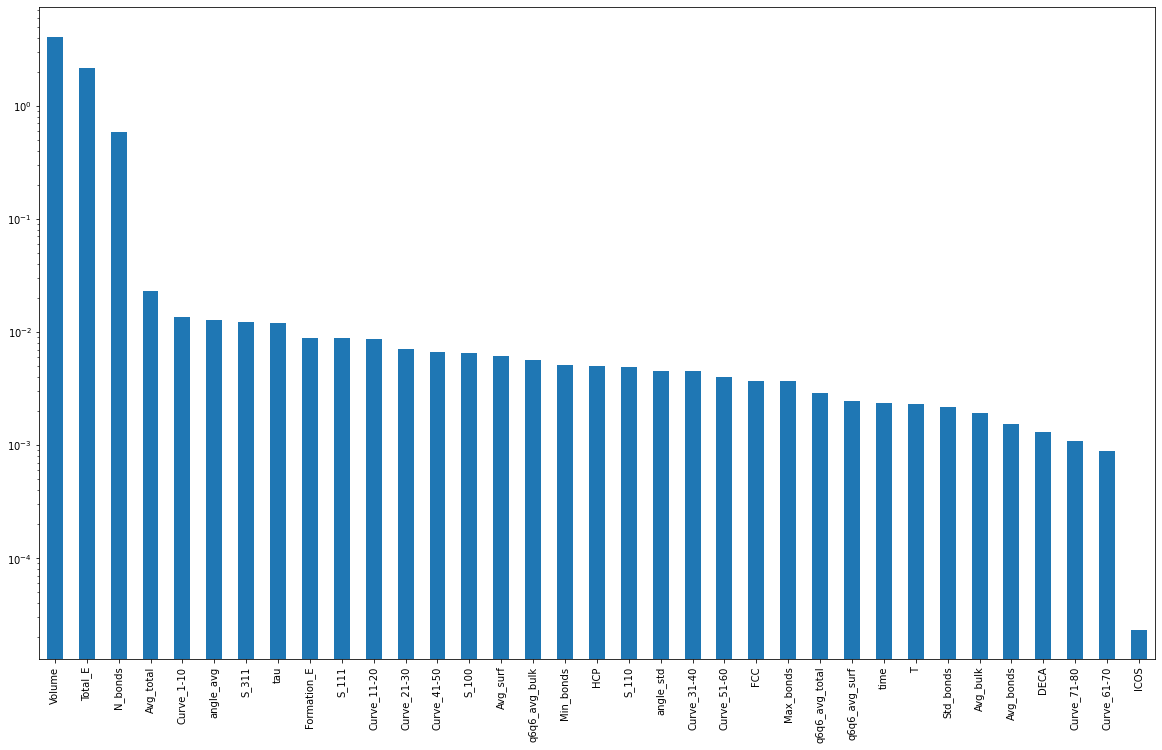

In [27]:
plt.figure(figsize=(20, 12))
shap_values_abs_df_describe_sorted.loc['mean'].plot(kind='bar',logy=True)
plt.show()

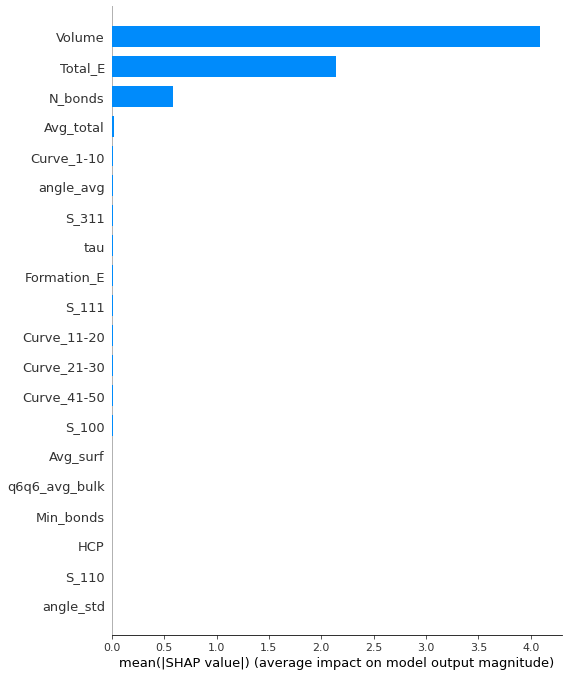

In [28]:
#SHAP API for the above bar plot -same results but nnot in log scale
shap.summary_plot(shap_values, features_test_df, plot_type="bar")

In [29]:
print(features_test.shape)
print(predictions_list['test'][0]) # predicted value
print(labels_test[0]) #original labels
print(set_d)

(400, 35)
19.62352081899286
[19.7274]
['train', 'val', 'test']


In [30]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

In [31]:
test_residu_np = np.array(test_residu)
test_residu_np_abs = np.abs(test_residu_np)
print(test_residu_np.shape)
print(test_residu_np_abs.sum()/400) #sanity test to check if we get the MAE loss correctly
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

(400,)
0.14161703475992904
[ 16 346  11 166 306 129  97 186 182 126]


In [32]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

print(best_10.shape)
print(worst_10.shape)

best_10_values = test_residu_np[list(best_set_ind)] #best 10% of residual values - closest to zero
worst_10_values = test_residu_np[list(worst_set_ind)] #worst 10% of residual values - furthest from zero

print(best_10_values.shape)
print(worst_10_values.shape)

(40, 35)
(40, 35)
(40,)
(40,)


In [33]:
best_10_values

array([ 0.00026017, -0.00098223, -0.00101138, -0.00123781,  0.00172106,
        0.00190542, -0.00209595,  0.0021531 ,  0.00217397,  0.00237899,
        0.00254443,  0.00272673, -0.00325919,  0.00376837,  0.00378027,
       -0.00384029, -0.00388945, -0.00427432, -0.00458725,  0.00516731,
        0.00525171, -0.00707864, -0.00715739, -0.00720278,  0.00796996,
       -0.00867734, -0.00871569,  0.00909608,  0.00914961,  0.00918561,
        0.00922112,  0.00936328, -0.00981674, -0.01015725, -0.01036255,
       -0.01064395,  0.01069753, -0.0108143 , -0.01103718,  0.01167205])

In [34]:
worst_10_values

array([ 0.31216863, -0.31608584,  0.32024965, -0.32786318, -0.328021  ,
        0.32860941, -0.34290847, -0.34698218,  0.35123324, -0.36651195,
       -0.3721013 , -0.37298124, -0.37621016, -0.37942481,  0.38065358,
        0.38729677,  0.38751157, -0.40490004, -0.41071544,  0.44071019,
       -0.45019008,  0.45410745,  0.45511746,  0.45878277, -0.46163753,
       -0.47758439,  0.49560735, -0.50686355, -0.53268486,  0.67225752,
        0.6765151 ,  0.68125219,  0.68660662,  0.69518104,  0.8188327 ,
        1.5431633 ,  1.58846364,  1.9114756 ,  2.22958645,  2.32903429])

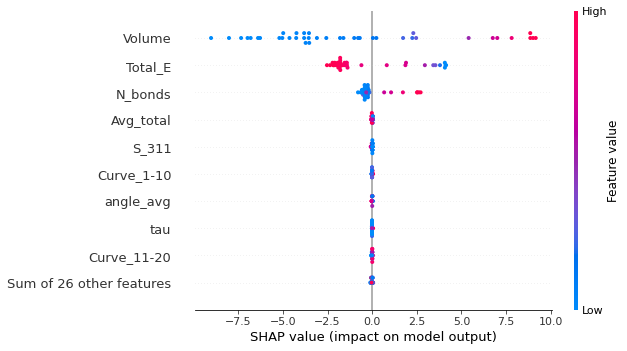

In [35]:
shap.plots.beeswarm(best_10,max_display=10)

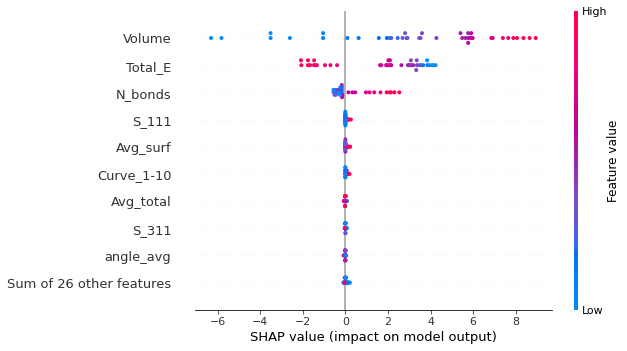

In [36]:
shap.plots.beeswarm(worst_10,max_display=10)

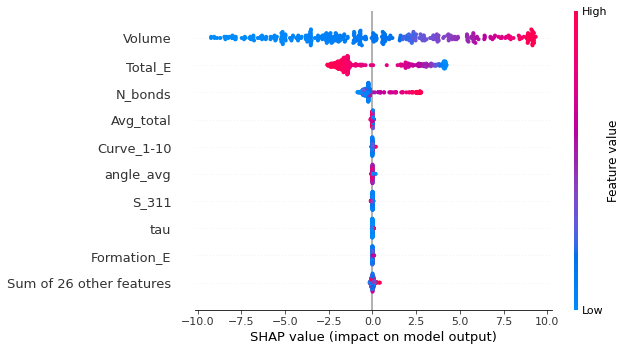

In [37]:
shap.plots.beeswarm(shap_values,max_display=10)

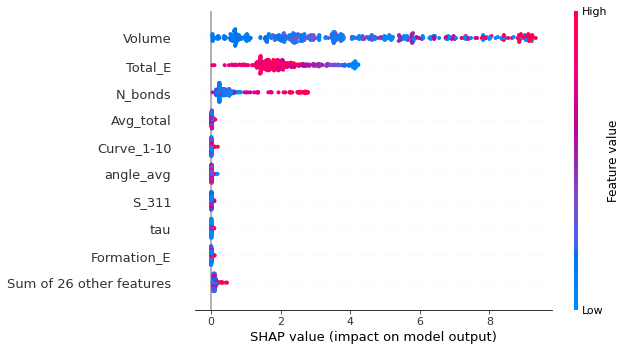

In [38]:
shap.plots.beeswarm(shap_values.abs, max_display=10)

In [39]:
print(labels_test[12])
print(labels_test[12] - predictions_list['test'][12])
print(predictions_list['test'][12])
print(sum(predictions_list['test'])/400)
# print(sum(labels_test)/400)

[17.5341]
[-0.02113858]
17.555238577855803
21.388575510139486


In [40]:
features_num = best_10.shape[1]

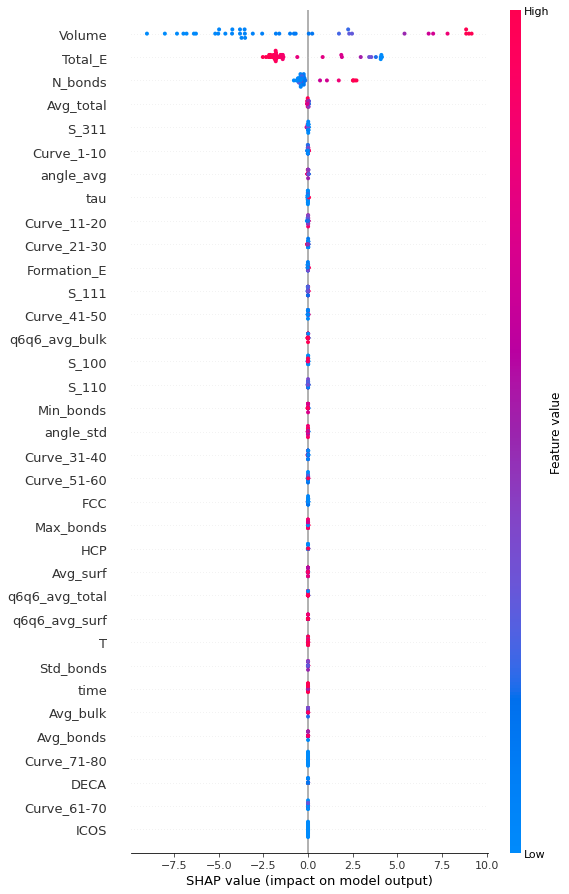

In [41]:
shap.plots.beeswarm(best_10,max_display=features_num)

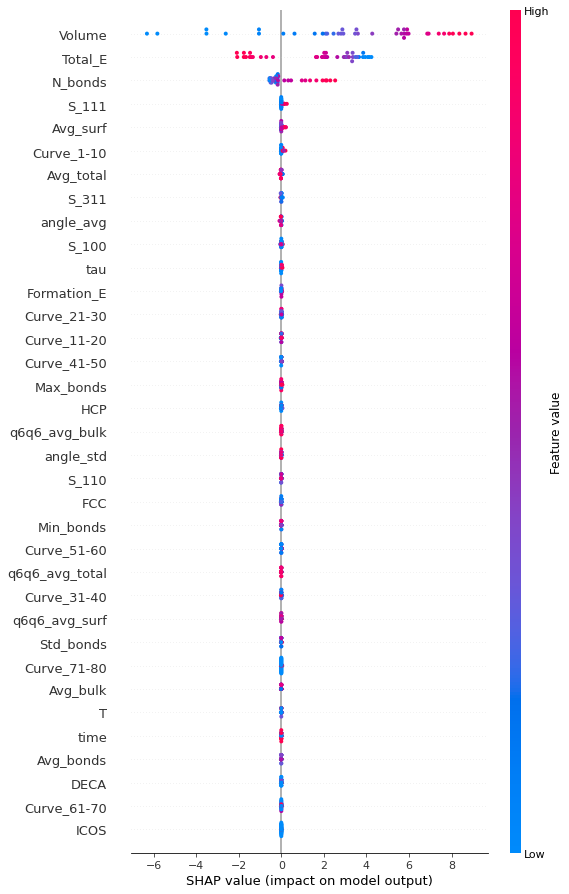

In [42]:
shap.plots.beeswarm(worst_10,max_display=features_num)

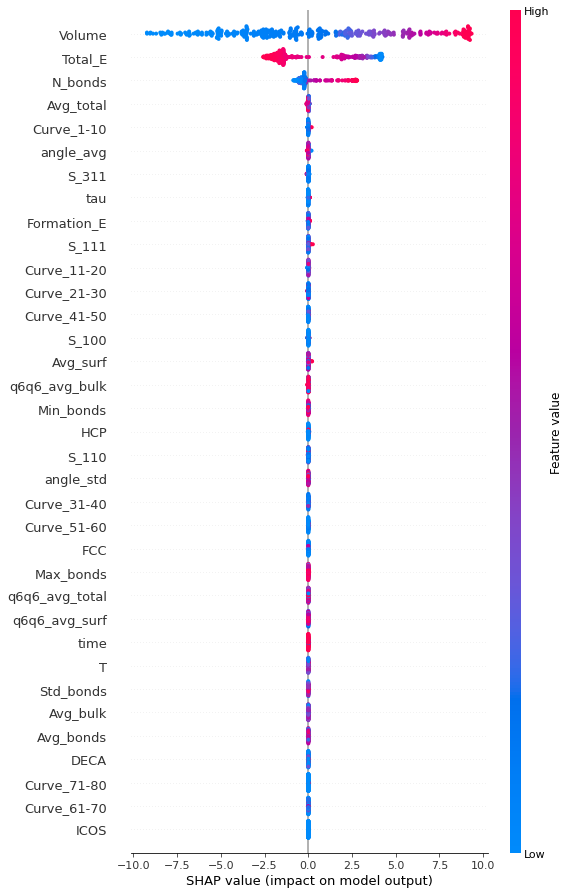

In [43]:
shap.plots.beeswarm(shap_values,max_display=features_num)

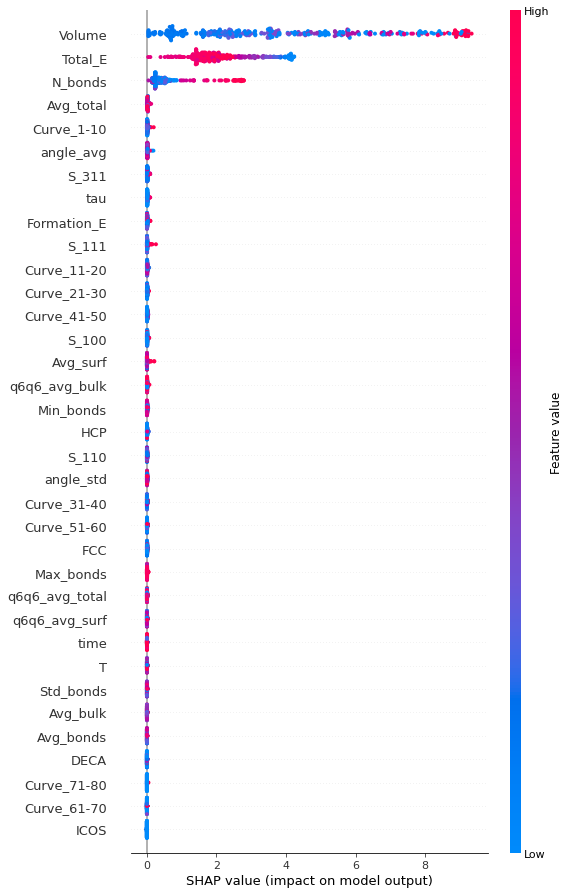

In [44]:
shap.plots.beeswarm(shap_values.abs, max_display=features_num)
